In [1]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import nltk
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [2]:
# Read the data from the dataframe
df1 = pd.read_csv('article.csv')
df2 = pd.read_csv('article_others.csv')
combine_df = [df1, df2]
df = pd.concat(combine_df)
df.head()

,Heading,Category,URL,Field Heading
0,Invention that makes renewable energy from rot...,Technology,https://www.theguardian.com/technology/2020/no...,Invention that makes renewable energy from rot...
1,Tesla joins Wall Street's S&P 500 share index,Technology,https://www.theguardian.com/technology/2020/de...,Tesla joins Wall Street's S&P 500 share index
2,"iPhones vulnerable to hacking tool for months,...",Technology,https://www.theguardian.com/technology/2020/de...,"iPhones vulnerable to hacking tool for months,..."
3,Ten billionaires reap $400bn boost to wealth d...,Technology,https://www.theguardian.com/technology/2020/de...,Ten billionaires reap $400bn boost to wealth d...
4,"Ryan Kaji, 9, earns $29.5m as this year's high...",Technology,https://www.theguardian.com/technology/2020/de...,"Ryan Kaji, 9, earns $29.5m as this year's high..."


In [3]:
# Check if there is any duplicate articles
df.drop_duplicates(subset='Heading')
df.shape

(29503, 4)

In [4]:
# Get the unique category
df.Category.unique() 

array(['Technology', 'Business', 'Culture', 'Environment', 'Fashion',
       'Film', 'Food', 'Life and style', 'Politics', 'Science',
       'Football', 'Sport', 'Travel', 'Music'], dtype=object)

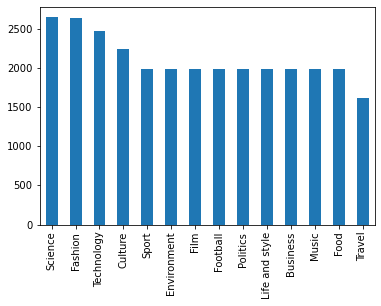

In [5]:
df.Category.value_counts().plot(kind='bar')

In [6]:
headlines = df["Heading"]
headlines

0       Invention that makes renewable energy from rot...
1           Tesla joins Wall Street's S&P 500 share index
2       iPhones vulnerable to hacking tool for months,...
3       Ten billionaires reap $400bn boost to wealth d...
4       Ryan Kaji, 9, earns $29.5m as this year's high...
                              ...                        
7105    The best mind, body and spirit breaks: readers...
7106    Get stuffed in Mauritius … on dholl puri, the ...
7107    Naples’ Fontanelle cemetery: skulls and silenc...
7108      Spirited away: on the bourbon trail in Kentucky
7109    Guardian Travel readers’ photography competiti...
Name: Heading, Length: 29503, dtype: object

In [7]:
target_label = df["Category"]
target_label

0       Technology
1       Technology
2       Technology
3       Technology
4       Technology
           ...    
7105        Travel
7106        Travel
7107        Travel
7108        Travel
7109        Travel
Name: Category, Length: 29503, dtype: object

In [8]:
# Encoding the labels - machine needs to underdstand this
label_encoder = LabelEncoder()
target_label = label_encoder.fit_transform(target_label)
label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

array(['Business', 'Culture', 'Environment', 'Fashion', 'Film', 'Food',
       'Football', 'Life and style', 'Music', 'Politics', 'Science',
       'Sport', 'Technology', 'Travel'], dtype=object)

In [9]:
# Perform test and train split
xtrain,xtest,ytrain,ytest=train_test_split(headlines,target_label,test_size=0.3,random_state=42)

In [10]:
print(len(xtrain))
print(xtrain.shape)
print(len(ytrain))
print(ytrain.shape)

20652
(20652,)
20652
(20652,)


In [11]:
# Vectorize
vectorizer =TfidfVectorizer(stop_words='english',ngram_range=(1,2))
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)

In [12]:
print(xtrain.shape)
print(ytest.shape)
print(ytrain.shape)
print(ytest.shape)

(20652, 116889)
(8851,)
(20652,)
(8851,)


In [13]:
model = svm.SVC(C=1,kernel='linear')
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
acc=accuracy_score(ytest,pred)
print(acc)
print(confusion_matrix(ytest,pred))

0.8236357473731781
[[491   1  21   4   2   3   3   9   3  34  10   3  13   4]
 [  0 544   3  11  16   2   2  20  30  13  18   4   2   2]
 [ 34   8 423   4   3   3   0  19   7   7  52   2   9   7]
 [  4  11   0 703   9   4   1  21   3   6   8   1   1   1]
 [  6  21   5  14 442   3   4  30  33   4  26   4   5   1]
 [  8   3  10   5   4 503   1  28   4   2  12   1   5   7]
 [  4   3   1   3   1   0 525  16   1   2   4  23   2   0]
 [ 18  13  13  25   7  19   5 449  13   7  27  11  11  12]
 [  6  24   2   5  52   3   2  28 427   3  29   5   1   3]
 [ 53   3  15   4   1   1   0   9   5 488  14   3   9   1]
 [  8  18  38   3   4   2   0  18   5   5 729   3   5   3]
 [ 10   7   0   2   3   0  15  12   5   3   6 528   1   1]
 [ 14   3   7   1   1   3   0  13  11   7  16   0 636   3]
 [  4   6  10   1   0   6   5  18   6   4  17   1   1 402]]


## HYPER PARAMETER TUNING FOR SVC?

In [14]:
# Parameters
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [15]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Best score for training data: 0.7953227091213133 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [17]:
# Tuned svm
model_svm = svm.SVC(C=1000,kernel='linear', gamma=0.001)
model_svm.fit(xtrain,ytrain)
pred=model_svm.predict(xtest)
acc=accuracy_score(ytest,pred)
print(acc)
print(confusion_matrix(ytest,pred))

0.8277030843972433
[[490   1  21   4   2   3   3   7   3  38  10   3  11   5]
 [  0 550   2  11  16   2   2  20  30  15  12   4   2   1]
 [ 37   7 421   4   3   4   0  19   7   9  46   2   8  11]
 [  3  10   0 709   8   6   1  18   3   5   7   1   1   1]
 [  5  20   5  13 448   4   4  26  33   5  25   3   5   2]
 [  6   3  11   6   5 509   1  26   4   3   9   0   3   7]
 [  3   3   1   3   1   0 529  15   0   2   4  22   2   0]
 [ 18  16  16  25   9  19   5 438  16   7  27  10  12  12]
 [  6  25   2   5  51   3   3  26 435   3  23   5   0   3]
 [ 49   2  16   4   1   1   0  10   5 495  11   2   8   2]
 [  9  20  35   3   4   2   1  16   8   6 724   3   7   3]
 [  6   6   1   2   4   0  15  11   7   4   5 528   1   3]
 [ 14   3   9   1   0   1   0  13   8   9  14   0 640   3]
 [  3   5  15   0   0   6   4  17   6   3  12   0   0 410]]


## Decision Tree

In [18]:
# Decision tree classfier
decision_model = DecisionTreeClassifier(random_state=42)
decision_model.fit(xtrain,ytrain)
pred=decision_model.predict(xtest)
acc=accuracy_score(ytest,pred)
print(acc)
print(confusion_matrix(ytest,pred))

0.6831996384589312
[[291   6  31  10   5  14   3  53  10  41  68   8  32  29]
 [  9 524   4   7  16   4   2  28  32   6  21   7   3   4]
 [ 38  11 261   7   5  10   1  56  17  10 119   1  13  29]
 [  2   7   1 672  10  18   2  25   9   0   9   2   7   9]
 [  9  23   6   7 302   2   0  57 143   6  21   8   8   6]
 [  9   2  11  14   3 472   3  35   9   4  15   0   8   8]
 [  6   3  13   8   1   1 468  21   9  20   5  14   2  14]
 [ 22  16  22  32  16  39  10 356  17   8  39   9  17  27]
 [  6  36   4  18  76   9   4  40 352   1  22   6  11   5]
 [ 41   1  21   4   3   6   4  32  17 381  58   1  12  25]
 [  5  14  14   3  11   7   0  33  38   7 682   0  21   6]
 [ 17   7  37  23  10  16  28  42  22  47  13 277   5  49]
 [  5   2   2   3   3   4   2  27  12   5  26   0 617   7]
 [  3   7   5   2   2  11   1  25  10   2  14   0   7 392]]


## Random Forest

In [19]:
# RandomeForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=42,n_jobs=-1)
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest)
acc=accuracy_score(ytest,pred)
print(acc)
print(confusion_matrix(ytest,pred))

0.7369788724437917
[[414  20  16  12   5  21   3  18   2  40  17   5  14  14]
 [  3 547   2  15  15   5   5  19  20  10  13   3   3   7]
 [ 47  25 319   9   5  11   2  25   9  15  73   5  19  14]
 [  2  21   2 691   8   5   3  15   5   3   8   0   5   5]
 [  9  46   4  15 387   9   2  40  50  10  13   2   5   6]
 [ 10  16   9  14   7 486   1  18   3   3  12   1   6   7]
 [  4   7   5   9   4   6 482  11   3  10   6  34   1   3]
 [ 27  56  15  42  17  38   5 358   2   7  25   8   9  21]
 [ 10  41   3  10 114   5   2  27 333   6  23   2   8   6]
 [ 63  15  17   7   4   4   1  13   6 419  31   4   6  16]
 [ 11  26  27  10   5   7   0  23  13  11 694   2   7   5]
 [ 24  20   7  10  13   4  31  22  12  23   9 402   3  13]
 [ 12  14   3   7   2   1   0  23   5  14  21   0 608   5]
 [  9  26   8   8   2   5   3  15   5   0   9   2   6 383]]
